# 利用NN分歧模型進行手寫數字辨識

## 1. 載入keras等套件

In [1]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow

import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


## 2. 從mnist資料庫讀入資料

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 3. 查看資料內容

Number is  3


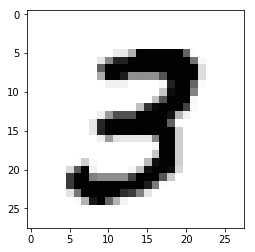

In [3]:
print("Number is ", y_train[7])
plt.imshow(x_train[7], cmap="Greys");

## 4. 確認x資料型態，並將變數修改為1維度的資料

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

## 5. 基於數字的各自獨立性，對y進行One-Hot Encoding (10維)處理

In [6]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 6. 載入functional API 需要的套件

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Input, concatenate, add
from keras.optimizers import SGD
from keras.models import Model

## 7. 添加網路層數並設定Activation function
### 使用functional API建構以下圖形中的模型:
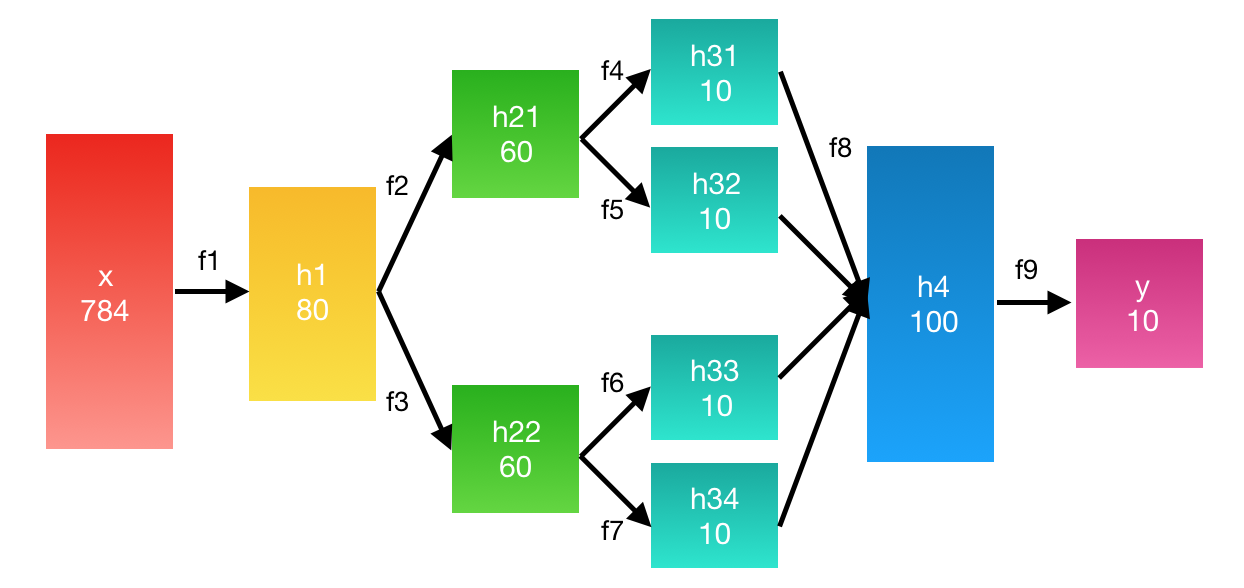

In [8]:
x = Input(shape = (784, ))

f1 = (Dense(80, activation="relu"))

f2 = (Dense(60, activation="relu"))
f3 = (Dense(60, activation="relu"))

f4 = (Dense(10, activation="relu"))
f5 = (Dense(10, activation="sigmoid"))
f6 = (Dense(10, activation="relu"))
f7 = (Dense(10, activation="sigmoid"))

f8 = (Dense(100, activation="relu"))

f9 = (Dense(10, activation="softmax"))

h1 = f1(x)

h21 = f2(h1)
h22 = f3(h1)

h31 = f4(h21)
h32 = f5(h21)
h33 = f6(h22)
h34 = f7(h22)

h4 = f8(concatenate([h31, h32, h33, h34]))

y = f9(h4)

model = Model(x, y)

Instructions for updating:
Colocations handled automatically by placer.


## 8. 定義loss function, optimizer 以及learning rate 並進行compile
* **Loss function:**  
Mean-square error  


* **Optimizer:**   
Stochastic gradient descent    



* **Learning rate:**  
0.078  


In [9]:
model.compile(loss = "mse", optimizer = SGD(lr = 0.078), metrics = ["accuracy"])

In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 80)           62800       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 60)           4860        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 60)           4860        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

## 9. 對training data進行fitting
每100組資料更改一次參數，對所有資料進行15次fitting

In [11]:
model_output = model.fit(x_train, y_train, batch_size = 100, epochs = 30, verbose = 1, validation_data = (x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 34us/step - loss: 0.0923 - acc: 0.4650 - val_loss: 0.0438 - val_acc: 0.6751
Epoch 2/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0371 - acc: 0.7156 - val_loss: 0.0345 - val_acc: 0.7766
Epoch 3/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0274 - acc: 0.8369 - val_loss: 0.0234 - val_acc: 0.8678
Epoch 4/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0207 - acc: 0.8763 - val_loss: 0.0180 - val_acc: 0.8855
Epoch 5/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0157 - acc: 0.9018 - val_loss: 0.0133 - val_acc: 0.9185
Epoch 6/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.0132 - acc: 0.9179 - val_loss: 0.0134 - val_acc: 0.9165
Epoch 7/30
60000/60000 [==============================] - 2s 31us/step - loss: 0

## 10. 利用testing data評估結果(accuracy > 90%)

In [12]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 26us/step


In [13]:
print('loss rate:', score[0])
print('accuracy:', score[1])

loss rate: 0.0069207211987792104
accuracy: 0.9591


## 11. 畫出model accuracy 和training 次數的關係圖

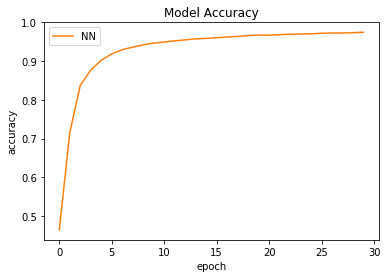

In [14]:
plt.plot(model_output.history["acc"], 'C1')
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["NN"], loc = "best")
plt.show()

## 12. 畫出loss rate 跟training 次數的關係圖

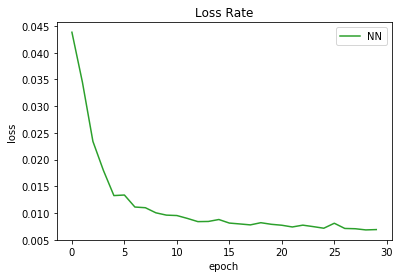

In [15]:
plt.plot(model_output.history["val_loss"], 'C2')
plt.title("Loss Rate")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["NN"], loc = "best")
plt.show()

## 13. 結論：可以看出準確率曲線大致平滑，並且在最後能達到95%的正確率